# Generate dataset

Here we generate white 128x128 pictures with drawn rectangles. Width of each rectangle border varies between 1pix and 5pix. 

Also, all pictures randomly rotated between -10 and 10 degrees.


In [1]:
import cv2
import random
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline

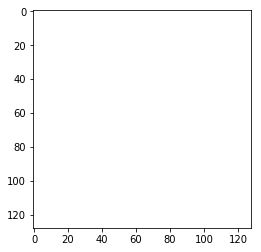

In [2]:
# example plain white
width = 128
height = 128

# list of pixel data set to white color
to_be_img = [(255, 255, 255)] * (width * height)

# create
img = Image.new('RGB', (width, height))
img.putdata(to_be_img)
img.save('test.jpg')
plt.imshow(img)  
plt.show()

## Helper functions

In [3]:
# draw black rectangle
def random_rectangle(img):
    # set (x1, y1) (x2, y2) for rectangle top left and bottom right corners
    left_x = img.shape[1] // 2
    right_x = img.shape[1]
    top_y = 0
    bottom_y = img.shape[0]
    while (right_x - left_x < bottom_y - top_y):
        # set left/right x coordinate between 10 and 118 pix
        left_x = random.randint(10, img.shape[1]//2 - 5)
        right_x = random.randint(img.shape[1]//2 + 5, img.shape[1] - 10)
        # set top/bottom y coordinate between 10 and 118 pix
        top_y = random.randint(10, img.shape[0]//2 - 5)
        bottom_y = random.randint(img.shape[0]//2 + 5, img.shape[0] - 10)        
    # draw rectangle
    return cv2.rectangle(img, (left_x, top_y), (right_x, bottom_y), (0,0,0), int(random.uniform(1, 5)))

# rotate image between -angle, angle
def random_rotation(img):
    # set range
    angles = 11
    angle = int(random.uniform(-angles, angles))
    height, width, ch = img.shape
    shape = (width, height)
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, shape), angle

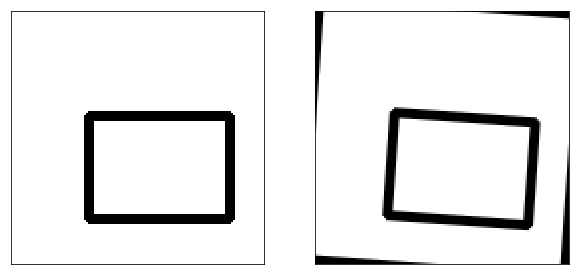

In [4]:
# example
img = mpimg.imread('test.jpg')
im = []
im.append(random_rectangle(img))
im_1, a = random_rotation(img)
im.append(im_1)

n_rows = 1
n_cols = 2
plt.figure(figsize=(10, 5))

for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    test = im[i]
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(test)

In [5]:
def draw_and_rotate(img, index, path, data):
    img.save('./{}/sample{}.jpg'.format(path, index))
        
    # draw black rectangle of 5 pixels width 
    img = mpimg.imread('./{}/sample{}.jpg'.format(path, index)) # read
    img = random_rectangle(img)

    # randomly rotate image
    img, angle = random_rotation(img)

    # save image
    cv2.imwrite('./{}/sample{}.jpg'.format(path, index), img)

    # save data for csv log
    data['image'].append('./{}/sample{}.jpg'.format(path, index))
    data['angle'].append(angle)

# create one samle image
def create_sample(index, data, category):
    # set WxH of image
    width = 128
    height = 128
    # list of pixel data set to white color (value = 255)
    to_be_img = [(255, 255, 255)] * (width * height)
    
    # create plain white image
    img = Image.new('RGB', (width, height), color=255)
    img.putdata(to_be_img)
    
    draw_and_rotate(img, index, category, data)

## Generate

In [6]:
# set number of samples to create
# 2000 training set, 600 validation set, 500 test set 
num_of_samples_train = 2000 + 600
num_of_samples_test = 500

In [7]:
# generate samples

# empty data dict for csv log
data_train = {'image':[], 'angle':[]}
data_test = {'image':[], 'angle':[]}

# Go!
# training set
for i in range(num_of_samples_train):
    create_sample(i, data_train, 'data_train')
    
# training set
for i in range(num_of_samples_test):
    create_sample(i, data_test, 'data_test')

## Check

Number of samples:    2600
Shape of the images:  (128, 128, 3)


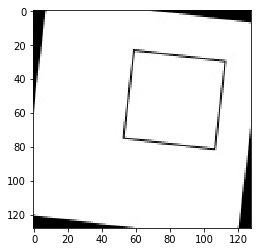

In [8]:
# load samples
samples = []
for img in glob.glob('./data_train/*.jpg'):
    image = mpimg.imread(img)
    samples.append(image)

print("Number of samples:   ", len(samples))
print("Shape of the images: ", samples[0].shape)
plt.imshow(samples[0], cmap='gray')
plt.show()

## Save to csv file ['angle', 'path/to/image']

In [9]:
# create pandas DF
samples_data_train = pd.DataFrame(data_train)
samples_data_test = pd.DataFrame(data_test)

In [10]:
samples_data_train.to_csv('datalog_train.csv', index=False)
samples_data_test.to_csv('datalog_test.csv', index=False)

In [11]:
# read csv logs and check if everything ok
rows = pd.read_csv('datalog_train.csv')
rows.describe()

,angle
count,2600.000000
mean,0.002308
std,6.005256
min,-10.000000
25%,-5.000000
50%,0.000000
75%,5.000000
max,10.000000
